# Dominant Color Extraction for Image Segmentation
## Image Segmentation
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation


<img src="https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/10.%20K-Means%20and%20Color%20Extraction/example.png?raw=true" alt="Pattern Recognition" style="width: 700px;"/>

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(330, 500, 3)


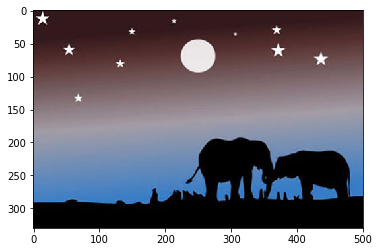

In [12]:
im = cv2.imread('elephant.jpg', flags=cv2.COLOR_BGR2RGB)
print(im.shape)
plt.imshow(im)
plt.show()

## Flatten each channel of image

In [13]:
# 3 channels = RGB
allPixels = im.reshape((-1,3))
print(allPixels.shape)

(165000, 3)


In [14]:
from sklearn.cluster import KMeans

In [19]:
dominantColors = 4
km = KMeans(n_clusters=dominantColors)

In [28]:
km.fit(allPixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
print(km.cluster_centers_)

[[ 128.25336478  145.24855346  174.77987421]
 [  64.49065646   35.28635682   38.01014671]
 [   1.15406       0.83632573    1.49597475]
 [ 117.87183223   94.85285947   98.69372544]]


In [30]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[128 145 174]
 [ 64  35  38]
 [  1   0   1]
 [117  94  98]]


## Plot all colors

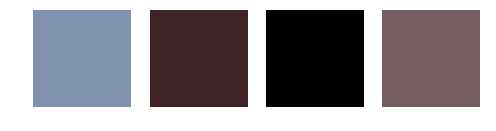

In [31]:
plt.figure(0, figsize=(8,2))
colors = []
for i in range(centers.shape[0]):
    color = centers[i]
    colors.append(color)
    plt.subplot(1,4,i+1)
    plt.axis("off")
    
    # Color swatch
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = color
    plt.imshow(a)
plt.show()

## Segmenting Original Image

In [34]:
newImg = np.zeros((330*500,3), dtype='uint8')
print(newImg.shape)

(165000, 3)


In [35]:
print(colors)

[array([128, 145, 174], dtype=uint8), array([64, 35, 38], dtype=uint8), array([1, 0, 1], dtype=uint8), array([117,  94,  98], dtype=uint8)]


In [36]:
print(km.labels_)

[1 1 1 ..., 2 2 2]


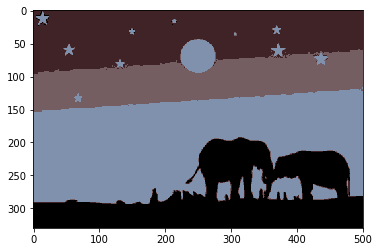

In [38]:
for i in range(newImg.shape[0]):
    newImg[i] = colors[km.labels_[i]]
newImg = newImg.reshape((330, 500, 3))
plt.imshow(newImg)
plt.show()